In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(ride_data, city_data, on="city")
merged_df
# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

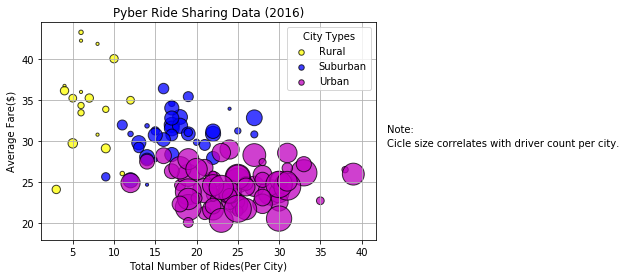

In [3]:
# Obtain the x and y coordinates for each of the three city types

#-----------------------------------------
#Creates the Rural DF and X, Y coordinates
#-----------------------------------------
rural_group = merged_df.loc[merged_df['type'] == "Rural", :]
rural_group_rides = rural_group.groupby('city')
rural_group_rides_count = rural_group_rides['city'].count()
rural_group_rides_avgfare = rural_group_rides['fare'].mean()

rural_x_axis = rural_group_rides_count
rural_y_axsis = rural_group_rides_avgfare
rural_drivers = rural_group_rides['driver_count'].mean()

#--------------------------------------------
#Creates the Suburban DF and X, Y coordinates
#--------------------------------------------
sub_group = merged_df.loc[merged_df['type'] == "Suburban", :]
sub_group_rides = sub_group.groupby('city')
sub_group_rides_count = sub_group_rides['city'].count()
sub_group_rides_avgfare = sub_group_rides['fare'].mean()

sub_x_axis = sub_group_rides_count
sub_y_axsis = sub_group_rides_avgfare
sub_drivers = sub_group_rides['driver_count'].mean()


#--------------------------------------------
#Creates the Urban DF and X, Y coordinates
#--------------------------------------------
urban_group = merged_df.loc[merged_df['type'] == "Urban", :]
urban_group_rides = urban_group.groupby('city')
urban_group_rides_count = urban_group_rides['city'].count()
urban_group_rides_avgfare = urban_group_rides['fare'].mean()

urban_x_axis = urban_group_rides_count
urban_y_axsis = urban_group_rides_avgfare
urban_drivers = urban_group_rides['driver_count'].mean()

# Build the scatter plots for each city types
fig = plt.figure()
ax1 = fig.add_subplot(111)

rural = ax1.scatter(rural_x_axis, rural_y_axsis, marker='o', facecolor='yellow', edgecolors='black', alpha =.75, s=rural_drivers*10)
suburban = ax1.scatter(sub_x_axis, sub_y_axsis, marker='o', facecolor='blue', edgecolors='black', alpha =.75, s=sub_drivers*10)
urban = ax1.scatter(urban_x_axis, urban_y_axsis, marker='o', facecolor='m', edgecolors='black', alpha =.75, s=urban_drivers*10)
plt.grid(True)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Create a legend
lgnd = plt.legend([rural, suburban, urban], ["Rural", "Suburban", "Urban"], markerscale=None, title="City Types")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(.925, 0.5, "Note:", fontsize=10, transform=plt.gcf().transFigure)
plt.text(.925, 0.45, "Cicle size correlates with driver count per city.", fontsize=10, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig('Pyber Ride Sharing Scatter.jpg', dpi=200)

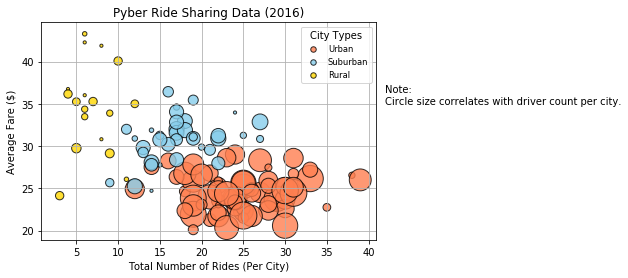

In [3]:
# Show plot
#plt.show()

## Total Fares by City Type

Text(0.5,1,'% of Total Fares by City Type')

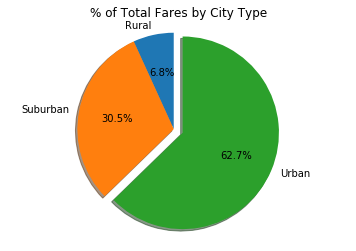

In [17]:
# Calculate Type Percents
rural_group_rides_percent = rural_group_rides['fare'].sum()/merged_df['fare'].sum()
sub_group_rides_percent = sub_group_rides['fare'].sum()/merged_df['fare'].sum()
urban_group_rides_percent = urban_group_rides['fare'].sum()/merged_df['fare'].sum()

percent_rural = rural_group_rides_percent.sum()
percent_sub = sub_group_rides_percent.sum()
percent_urban = urban_group_rides_percent.sum()

# Build Pie Chart
percents = [percent_rural, percent_sub, percent_urban]
labels = ['Rural', 'Suburban', 'Urban']
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(percents, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig('Pyber Ride Sharing Fares Pie.jpg', dpi=200)

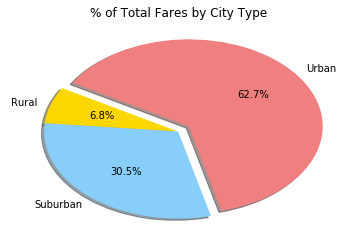

In [4]:
# Show Figure
#plt.show()

## Total Rides by City Type

Text(0.5,1,'% of Total Rides by City Type')

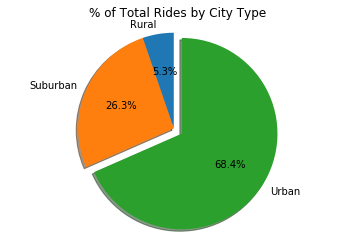

In [19]:
# Calculate Ride Percents
rural_group_rides_percent_count = rural_group_rides_count/len(merged_df)
sub_group_rides_percent_count = sub_group_rides_count/len(merged_df)
urban_group_rides_percent_count = urban_group_rides_count/len(merged_df)

c_percent_rural = rural_group_rides_percent_count.sum()
c_percent_sub = sub_group_rides_percent_count.sum()
c_percent_urban = urban_group_rides_percent_count.sum()

# Build Pie Chart

c_percents = [c_percent_rural, c_percent_sub, c_percent_urban]
c_labels = ['Rural', 'Suburban', 'Urban']
c_explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(c_percents, explode=c_explode, labels=c_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig('Pyber Ride Sharing Rides Pie.jpg', dpi=200)

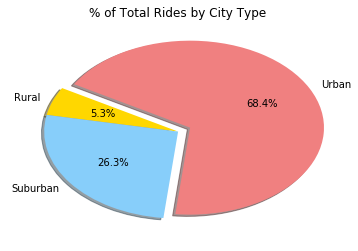

In [5]:
# Show Figure
#plt.show()

## Total Drivers by City Type

Text(0.5,1,'% of Total Drivers by City Type')

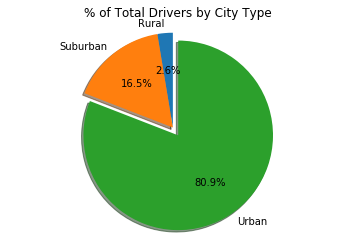

In [26]:
# Calculate Driver Percents
totaldrivers = rural_drivers.sum() + sub_drivers.sum() + urban_drivers.sum()

rural_group_rides_percent_driver = rural_drivers/totaldrivers
sub_group_rides_percent_driver = sub_drivers/totaldrivers
urban_group_rides_percent_driver = urban_drivers/totaldrivers

d_percent_rural = rural_group_rides_percent_driver.sum()
d_percent_sub = sub_group_rides_percent_driver.sum()
d_percent_urban = urban_group_rides_percent_driver.sum()

# Build Pie Charts
d_percents = [d_percent_rural, d_percent_sub, d_percent_urban]
d_labels = ['Rural', 'Suburban', 'Urban']
d_explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(d_percents, explode=d_explode, labels=d_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig('Pyber Ride Sharing Drivers Pie.jpg', dpi=200)

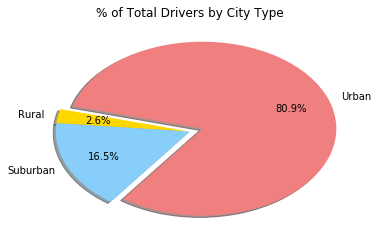

In [6]:
# Show Figure
#plt.show()